# Implementing DTW algorithm
### Meenakshi Mishra
### CS 555/655

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
# defining the distorsion plot which uses euclidean distances (distances)
def distorsion_plot(distances,xlabel="x",ylabel="y",all_ticks=False,figure=True):
    distances=distances.T
    if figure:
        plt.figure(figsize =(10,10))
    plt.imshow(distances, interpolation='nearest', cmap='Greens') 
    plt.gca().invert_yaxis()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if all_ticks:
        plt.xticks(range(distances.shape[1]),range(distances.shape[1]))
        plt.yticks(range(distances.shape[0]),range(distances.shape[0]))
    plt.grid()
    plt.colorbar();

In [3]:
# defining the path_cost_p which uses input (x), template (y), accumulated cost and distances. len(x) is length of x, len(y) 
# is length of y. For example, the path starts from the top right of the xy matrix [87,54], in case of Yes template and 
# and input 1 and ends at bottom left [0,0]. As long as i or j are greater than 0 the while loop is executed.Basically, the first 
# 2 if statements in the while loop (if i==0, elseif j==0) take care of edge cases. The else statement checks which of the three 
# nearest point to [i,j] is minimum. In the end one of the three points [i-1,j],[i,j-1] or [i-1,j-1] is selected and the path 
# travels downwards. The path is appended with new value of i and j. The cost of travelling to the new point [x,y] is calculated
# as cost + distance [x,y]. This is the partial distorsion at any point [x,y] along the path. The final cost or the total distorsion
# is once the path is complete.


def path_cost_p(x, y, accumulated_cost, distances):
    
    path = [[len(x)-1, len(y)-1]]
    
    cost = 0
    
    i = len(x)-1
    j = len(y)-1
    
    while i>0 or j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j - 1
            else:
                i = i - 1
                j = j - 1
        path.append([i, j])
    for [x, y] in path:
        cost = cost +distances[x, y]
    return path, cost

In [4]:
# This chunk defines the function accumulated_cost_c. It essentially generates a matrix of minimum accumutated cost for each
# point in the distance matrix.
def accumulated_cost_c(x,y,distances):
    accumulated_cost = np.zeros((len(x), len(y)))
    
    accumulated_cost[0,0] = distances[0,0]
    
    for i in range(1, len(x)):
        accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]

    for j in range(1, len(y)):
        accumulated_cost[0,j] = distances[0,j] + accumulated_cost[0, j-1]
        
    for i in range(1, len(x)):
        for j in range(1, len(y)):
            accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
            
    return accumulated_cost

In [5]:
# Defining function distance_Eu which calculates the Euclidean distance matrix with DTW between each original points x y points
# and the warped x y points.
def distance_Eu(x,y):
    '''
    Generates the distance matrix used with Dynamic Time Warping 
    => for systems with N dimensions
    '''
    assert len(x.shape)==len(y.shape), "Inputs must have the same number of columns"
    
    if len(x.shape)==1:
        x=x.reshape((x.shape[0],1))
        y=y.reshape((y.shape[0],1))
    
    assert x.shape[1]==y.shape[1], "Inputs must have the same number of columns" # verifies if the second dimension matches
    # Creates the helper matrix
    helper_matrix=np.ones((y.shape[0],x.shape[0]))

    # returns all the distances between original points and generated ones
    return (np.sqrt(np.array([((x[:,i]*helper_matrix).T-y[:,i])**2 for i in range(x.shape[1])]).sum(axis=0)))

In [6]:
#Checking the input file shapes
!head hw_hw1_part2_data_input1.txt

88 20
1 -0.0967 -0.2516 -0.5097 -0.5247 -0.5026 -0.4123 -0.4593 -0.4910 -0.5098 -0.4004 -0.3796 -0.3970 -0.5448 -0.5246 -0.6479 -0.6006 -0.6927 -0.6460 -0.5620 -0.4987 
1 0.1338 -0.0014 -0.0907 -0.1972 -0.3658 -0.4290 -0.3334 -0.3049 -0.4788 -0.3766 -0.3428 -0.3301 -0.3765 -0.3568 -0.4046 -0.4024 -0.6402 -0.6675 -0.5984 -0.5353 
1 0.1667 0.2130 0.0662 -0.1480 -0.2812 -0.4380 -0.3245 -0.2660 -0.3279 -0.3723 -0.2968 -0.0719 -0.1135 -0.1928 -0.1534 -0.1679 -0.4696 -0.5327 -0.4721 -0.4048 
1 0.1900 0.2624 0.1264 -0.1259 -0.2325 -0.2604 -0.2265 -0.1928 -0.2028 -0.3113 -0.3105 -0.0768 -0.0743 -0.1680 -0.1306 -0.0862 -0.3056 -0.4269 -0.3633 -0.3293 
1 0.2030 0.2483 0.1510 -0.0876 -0.1744 -0.2391 -0.2300 -0.1851 -0.1886 -0.2645 -0.2613 -0.0245 -0.0804 -0.2109 -0.1779 -0.1140 -0.2987 -0.4124 -0.3554 -0.3185 
1 0.2155 0.2093 0.1685 -0.1528 -0.2120 -0.2260 -0.1427 -0.1400 -0.1751 -0.2356 -0.2394 -0.0389 -0.0995 -0.1351 -0.0730 -0.0844 -0.2592 -0.3527 -0.2805 -0.2408 
1 0.2320 0.1769 0.2001 -0.107

In [7]:
# loading the input file and checking the final shape
x=np.loadtxt('hw_hw1_part2_data_input1.txt',skiprows=1)[:,1:]
x.shape

(88, 20)

In [8]:
# Loading the template and checking the final shape
y=np.loadtxt('hw_hw1_part2_data_yes_template.txt',skiprows=1)[:,1:]
y.shape

(55, 20)

# Generating distorsion plots and path for "input 1" and "yes"

[[1.34310412 1.76144297 2.21592365 ... 1.42955595 1.25885168 1.09489815]
 [0.67163088 1.09315305 1.58663224 ... 1.18429859 1.07267621 0.92486774]
 [0.49233957 0.61853355 1.03715976 ... 1.06982599 1.09162605 1.0803109 ]
 ...
 [1.06961272 1.13957541 1.38927029 ... 0.39998499 0.46359148 0.54321668]
 [0.84699471 0.95764589 1.29867995 ... 0.49819155 0.46271264 0.43691975]
 [0.83674558 0.9816061  1.32182609 ... 0.52440791 0.47893272 0.41786925]]


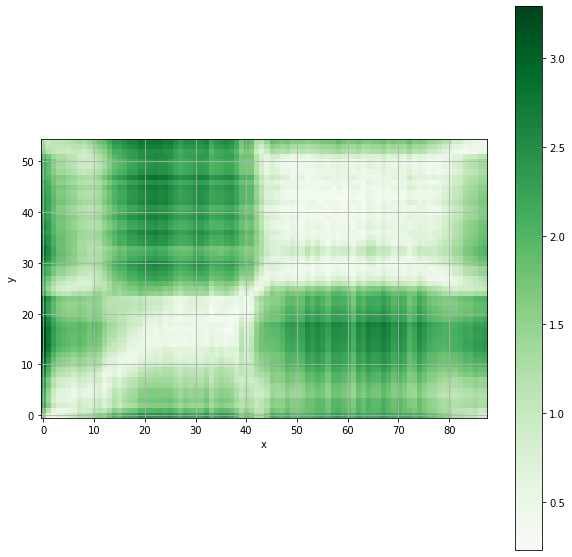

In [9]:
# generating the distorsion plot of euclidean distances
dist= distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  1.34310412   3.10454709   5.32047074 ... 131.67056881 132.92942049
  134.02431863]
 [  2.014735     2.43625717   4.02288941 ... 111.62159186 112.69426807
  113.61913581]
 [  2.50707457   2.63326855   3.47341692 ...  91.94342467  93.03505072
   94.11536162]
 ...
 [161.83378614 135.36918915 122.55645293 ...  41.63102351  41.69463001
   41.89387614]
 [162.68078085 136.32683504 123.85513288 ...  42.12921506  42.09373616
   42.13154976]
 [163.51752643 137.30844114 125.17695897 ...  42.65362298  42.57266888
   42.51160541]]
[[87, 54], [86, 53], [85, 52], [84, 52], [83, 52], [82, 52], [81, 52], [80, 51], [79, 50], [78, 49], [77, 48], [76, 47], [75, 46], [74, 45], [73, 44], [72, 44], [71, 44], [70, 43], [69, 43], [68, 43], [67, 43], [66, 43], [65, 42], [64, 41], [63, 40], [62, 39], [61, 38], [60, 37], [59, 36], [58, 35], [57, 34], [56, 33], [55, 32], [54, 31], [53, 30], [52, 29], [51, 29], [50, 29], [49, 28], [48, 28], [47, 28], [46, 28], [45, 28], [44, 27], [43, 26], [42, 25], [41, 24], [

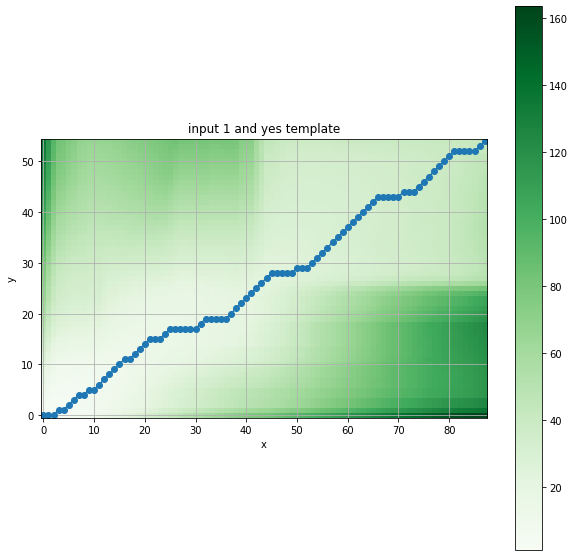

In [10]:
# generating the distorsion plot of accumulated_cost
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 1 and yes template")
plt.show()

# Generating distorsion plots and path for "input 1" and "no"

[[0.89818039 0.95304993 1.0482696  ... 1.0140195  1.06306897 1.01968941]
 [1.15238934 0.93782737 1.03821387 ... 0.8901455  1.19055092 1.20022506]
 [1.43280353 1.07283518 1.10543175 ... 1.03336295 1.31812842 1.38088685]
 ...
 [1.28902443 0.97585964 1.08688113 ... 0.73338533 0.89212097 0.96806972]
 [1.32173138 1.01187214 1.13024007 ... 0.65183974 0.95641948 1.00806426]
 [1.30692956 1.01419541 1.12129564 ... 0.67759263 0.93514415 1.00113888]]


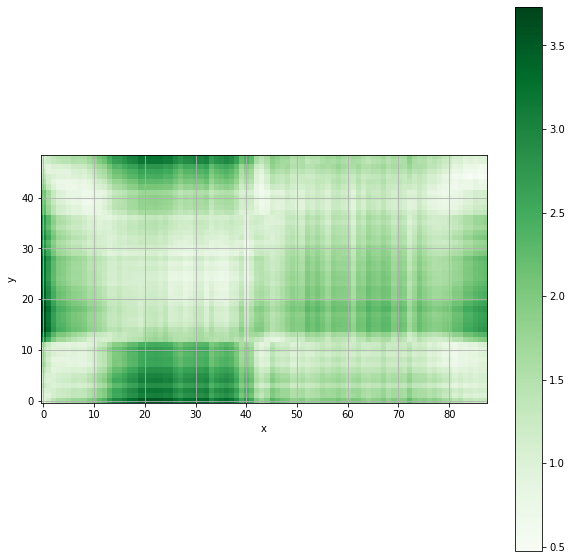

In [11]:
x=np.loadtxt('hw_hw1_part2_data_input1.txt',skiprows=1)[:,1:]
y=np.loadtxt('hw_hw1_part2_data_no_template.txt',skiprows=1)[:,1:]
dist=distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  0.89818039   1.85123032   2.89949992 ... 113.39875929 114.46182826
  115.48151767]
 [  2.05056974   1.83600776   2.87422163 ...  96.14639476  97.33694568
   98.53717074]
 [  3.48337327   2.90884294   2.94143951 ...  80.41091817  81.72904659
   83.10993344]
 ...
 [197.12611457 165.05335407 165.16437555 ...  87.9519654   88.33047519
   89.00827625]
 [198.44784595 166.06522621 166.18359414 ...  88.36908789  88.90838489
   89.33853945]
 [199.75477551 167.07942162 167.18652185 ...  88.89785213  89.30423205
   89.90952377]]
[[87, 48], [86, 47], [85, 46], [84, 45], [83, 44], [82, 44], [81, 43], [80, 42], [79, 41], [78, 41], [77, 41], [76, 41], [75, 40], [74, 39], [73, 39], [72, 39], [71, 39], [70, 39], [69, 39], [68, 39], [67, 39], [66, 39], [65, 39], [64, 39], [63, 38], [62, 38], [61, 38], [60, 38], [59, 38], [58, 38], [57, 38], [56, 38], [55, 38], [54, 38], [53, 38], [52, 38], [51, 38], [50, 38], [49, 38], [48, 38], [47, 38], [46, 37], [45, 36], [44, 35], [43, 34], [42, 33], [41, 32], [

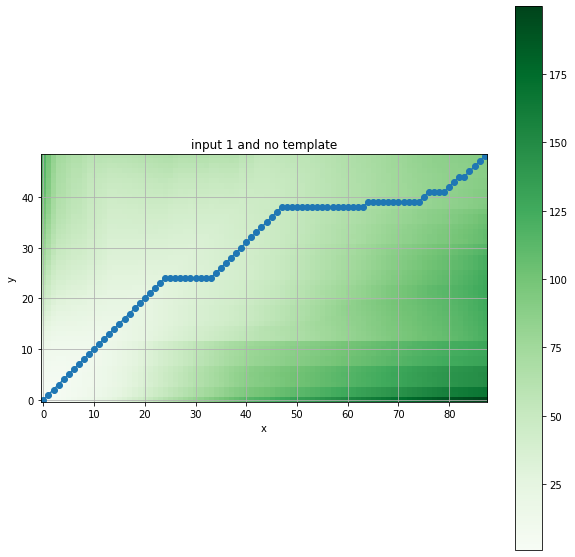

In [12]:
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 1 and no template")
plt.show()

# Generating distorsion plots and path for "input 2" and "yes"

[[1.71523155 2.03450536 2.44404192 ... 1.51275531 1.36825126 1.3620146 ]
 [1.11185348 1.29763938 1.6834457  ... 0.97804792 0.90772208 0.9731698 ]
 [1.11694109 1.26038688 1.59113158 ... 0.89563384 0.90231906 0.97776073]
 ...
 [1.77323263 2.00722445 2.35915622 ... 1.30977527 1.20463689 1.2513243 ]
 [1.89161024 2.13183989 2.47254678 ... 1.45105921 1.35047576 1.40785682]
 [2.02786191 2.24873079 2.56810674 ... 1.44396982 1.34880644 1.40928752]]


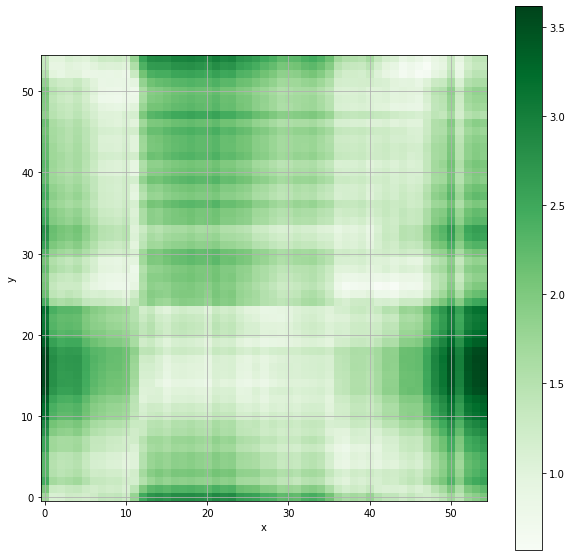

In [13]:
x=np.loadtxt('hw_hw1_part2_data_input2.txt',skiprows=1)[:,1:]
y=np.loadtxt('hw_hw1_part2_data_yes_template.txt',skiprows=1)[:,1:]
dist=distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  1.71523155   3.7497369    6.19377882 ... 134.94817858 136.31642984
  137.67844444]
 [  2.82708503   3.01287093   4.69631662 ... 101.10365443 102.01137651
  102.98454631]
 [  3.94402611   4.08747191   4.60400251 ...  96.00582688  96.90814594
   97.88590666]
 ...
 [103.44603472  88.39791232  80.00080529 ...  69.07326612  69.53207479
   70.05666142]
 [105.33764496  90.52975221  82.47335207 ...  69.93141525  70.42374188
   70.93993161]
 [107.36550687  92.778483    85.04145881 ...  70.66990588  71.28022169
   71.8330294 ]]
[[54, 54], [53, 53], [52, 52], [51, 51], [50, 50], [49, 49], [48, 48], [47, 47], [46, 46], [46, 45], [46, 44], [46, 43], [45, 42], [44, 41], [43, 40], [42, 39], [41, 38], [40, 37], [39, 36], [38, 35], [37, 34], [36, 33], [35, 32], [34, 31], [33, 30], [32, 29], [31, 28], [30, 27], [29, 26], [28, 25], [27, 24], [26, 23], [25, 22], [24, 21], [23, 20], [22, 19], [21, 18], [20, 17], [19, 16], [18, 15], [17, 14], [16, 13], [15, 12], [14, 11], [13, 10], [12, 9], [11, 8], [10

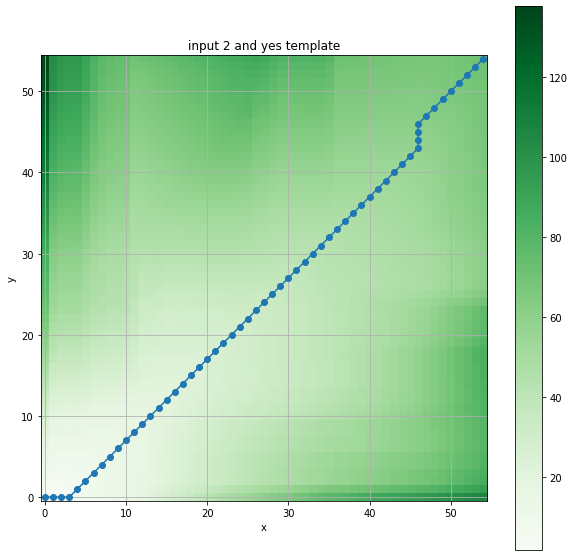

In [14]:
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 2 and yes template")
plt.show()

# Generating distorsion plots and path for "input 2" and "no"

[[0.46300322 0.82672447 0.74435738 ... 1.20455071 0.87963993 0.88974089]
 [0.67888697 0.38949443 0.43357282 ... 0.74458419 0.73465305 0.79093124]
 [0.76208315 0.35079267 0.46156822 ... 0.74424708 0.73792321 0.77810108]
 ...
 [0.47777608 0.75037066 0.67554037 ... 1.10974538 0.62120822 0.65028835]
 [0.54836148 0.84805488 0.78404528 ... 1.22117424 0.79423426 0.8332035 ]
 [0.7196664  0.98760907 0.94153535 ... 1.27441787 0.76618341 0.7938127 ]]


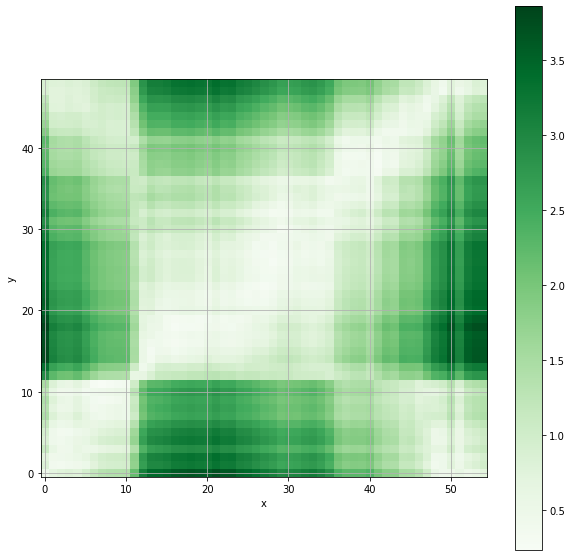

In [15]:
x=np.loadtxt('hw_hw1_part2_data_input2.txt',skiprows=1)[:,1:]
y=np.loadtxt('hw_hw1_part2_data_no_template.txt',skiprows=1)[:,1:]
dist=distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  0.46300322   1.28972769   2.03408507 ... 115.77270231 116.65234224
  117.54208314]
 [  1.14189019   0.85249765   1.28607047 ...  84.85764633  85.59229938
   86.38323062]
 [  1.90397334   1.20329032   1.31406586 ...  80.17588948  80.91381269
   81.69191377]
 ...
 [119.14011691  99.80304209  99.63620007 ...  26.24400909  24.51916165
   24.54824178]
 [119.68847838 100.65109697 100.42024535 ...  27.46518332  25.31339591
   25.35236514]
 [120.40814478 101.63870604 101.3617807  ...  28.7396012   26.07957932
   26.10720861]]
[[54, 48], [53, 47], [52, 47], [51, 47], [50, 47], [49, 47], [48, 46], [47, 45], [46, 44], [45, 43], [44, 42], [43, 41], [42, 40], [41, 39], [40, 38], [39, 37], [38, 36], [37, 35], [36, 34], [35, 33], [34, 32], [33, 31], [32, 30], [31, 29], [30, 28], [29, 27], [28, 26], [27, 25], [26, 24], [25, 23], [24, 22], [23, 21], [22, 20], [21, 19], [20, 19], [19, 19], [18, 18], [17, 18], [16, 17], [15, 16], [14, 15], [13, 14], [12, 13], [11, 12], [10, 11], [9, 10], [8, 9], [7, 

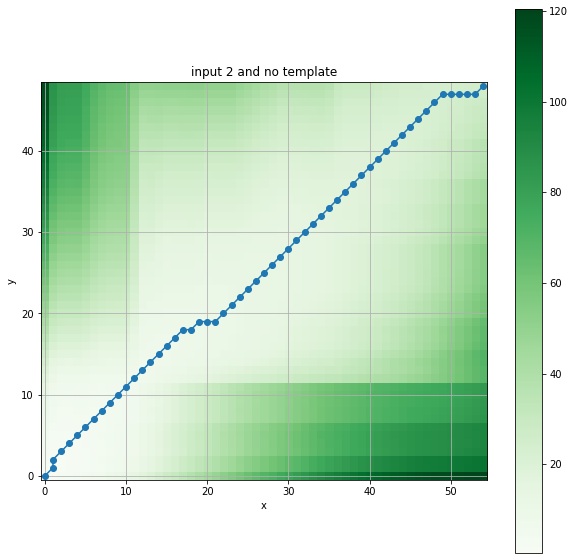

In [16]:
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 2 and no template")
plt.show()

## Generating distorsion plots and path for "input 3" and "yes"

[[0.78091678 1.15322995 1.67613838 ... 1.26681896 1.13610307 0.99269017]
 [0.83424738 1.04440922 1.48199943 ... 0.98523372 0.9188285  0.89586127]
 [0.91841087 1.29798099 1.81831057 ... 1.30066159 1.12971228 0.99915329]
 ...
 [1.09042762 1.32003177 1.64478997 ... 0.6776475  0.6552058  0.53312905]
 [1.08583968 1.28228147 1.62497968 ... 0.62336942 0.56878142 0.50455398]
 [1.12312181 1.36044757 1.72163167 ... 0.7457565  0.61707456 0.5055395 ]]


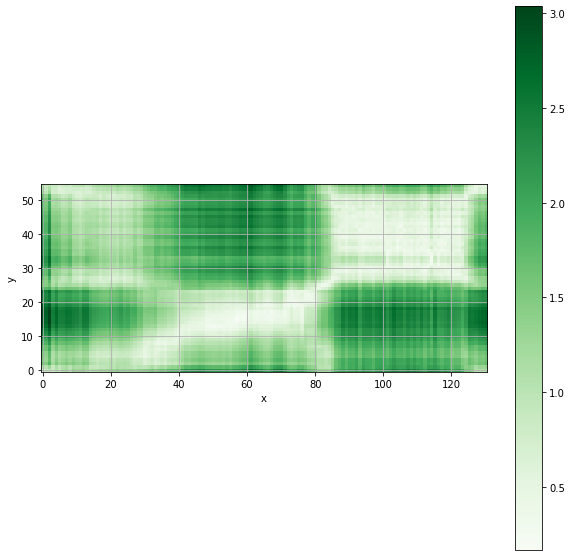

In [17]:
x=np.loadtxt('hw_hw1_part2_data_input3.txt',skiprows=1)[:,1:]
y=np.loadtxt('hw_hw1_part2_data_yes_template.txt',skiprows=1)[:,1:]
dist=distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  0.78091678   1.93414672   3.61028511 ... 115.84072283 116.9768259
  117.96951607]
 [  1.61516415   1.82532599   3.30732542 ... 101.8963303  102.81515881
  103.71102008]
 [  2.53357502   2.91314515   3.64363656 ... 102.21175816 103.02604258
  103.81431209]
 ...
 [241.51167737 202.52014314 180.49044478 ...  70.36220545  70.2993223
   70.17724555]
 [242.59751705 203.80242461 182.11542446 ...  70.98557487  70.86810372
   70.68179953]
 [243.72063886 205.16287218 183.83705613 ...  71.73133137  71.48517828
   71.18733903]]
[[130, 54], [129, 54], [128, 54], [127, 53], [126, 52], [125, 51], [124, 50], [123, 49], [122, 48], [121, 47], [120, 46], [119, 45], [118, 44], [117, 43], [116, 43], [115, 42], [114, 41], [113, 40], [112, 39], [111, 38], [110, 37], [109, 36], [108, 35], [107, 35], [106, 35], [105, 35], [104, 35], [103, 34], [102, 33], [101, 32], [100, 31], [99, 30], [98, 29], [97, 29], [96, 29], [95, 29], [94, 29], [93, 29], [92, 29], [91, 29], [90, 29], [89, 29], [88, 29], [87, 29], [8

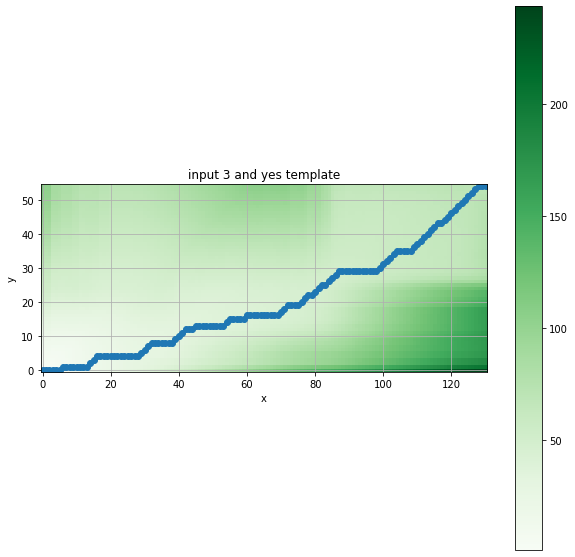

In [18]:
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 3 and yes template")
plt.show()

# Generating distorsion plots and path for "input 3" and "no"

[[1.10661331 0.96053575 0.969038   ... 0.93605903 1.15634357 1.15161189]
 [1.04458521 0.80889259 0.76896238 ... 0.79182253 0.91486776 0.98389107]
 [1.05229171 0.96247243 0.98170654 ... 0.94515265 1.12420644 1.1207192 ]
 ...
 [1.10172318 0.87307889 1.00246401 ... 0.7616015  0.75426277 0.75019799]
 [1.10611692 0.92660994 0.99272953 ... 0.77706274 0.75221012 0.80745262]
 [1.17390231 1.0032252  1.08187838 ... 0.77503466 0.8338837  0.88560871]]


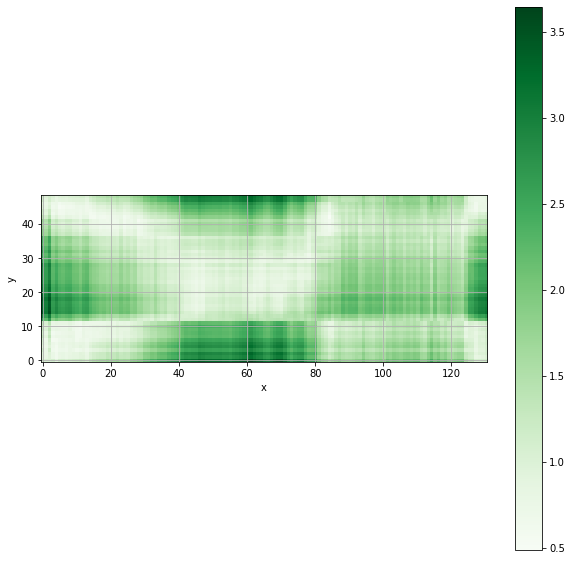

In [19]:
x=np.loadtxt('hw_hw1_part2_data_input3.txt',skiprows=1)[:,1:]
y=np.loadtxt('hw_hw1_part2_data_no_template.txt',skiprows=1)[:,1:]
dist=distance_Eu(x,y)
print(dist)
distorsion_plot(dist)

[[  1.10661331   2.06714905   3.03618705 ... 100.24574124 101.40208481
  102.5536967 ]
 [  2.15119852   1.9155059    2.68446827 ...  88.0145941   88.92946186
   89.91335292]
 [  3.20349023   2.87797832   2.89721243 ...  88.16792421  89.13880054
   90.05018105]
 ...
 [292.87391282 244.9517444  245.08112953 ... 122.79133158 122.98346685
  123.49238792]
 [293.98002975 245.87835434 245.94447393 ... 123.56839432 123.5435417
  123.79091946]
 [295.15393206 246.88157954 246.96023272 ... 124.34342898 124.3774254
  124.4291504 ]]
[[130, 48], [129, 47], [128, 46], [127, 45], [126, 44], [125, 43], [124, 42], [123, 41], [122, 40], [121, 39], [120, 38], [119, 38], [118, 38], [117, 38], [116, 38], [115, 38], [114, 38], [113, 38], [112, 38], [111, 38], [110, 38], [109, 38], [108, 38], [107, 38], [106, 38], [105, 38], [104, 38], [103, 38], [102, 38], [101, 38], [100, 38], [99, 38], [98, 38], [97, 38], [96, 38], [95, 38], [94, 38], [93, 38], [92, 38], [91, 38], [90, 38], [89, 38], [88, 38], [87, 38], [8

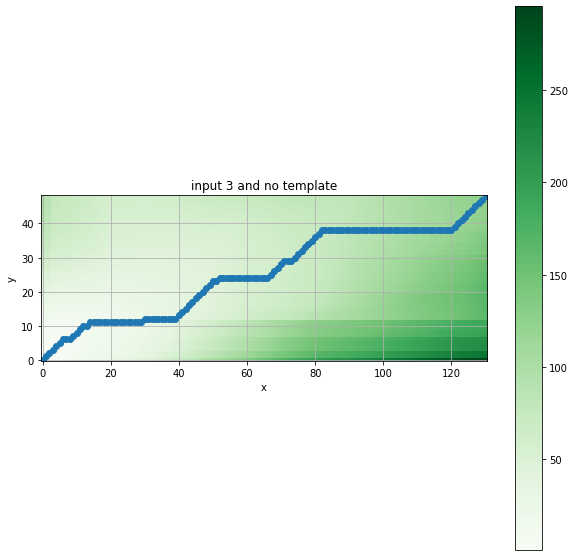

In [20]:
accumulated_cost = accumulated_cost_c(x,y,dist)
path,cost = path_cost_p(x, y, accumulated_cost, dist)

print (accumulated_cost)
print (path,cost)

path = np.array(path)

distorsion_plot(accumulated_cost)
plt.plot(path[:,0],path[:,1],'o-')
plt.title("input 3 and no template")
plt.show()

Use results to perform ASR…
A) is input1.txt more likely to be “yes” or “no”? - Yes, since the cost for yes (42.511605406813615) is less than that for no (89.90952376802427)
B) is input2.txt more likely to be “yes” or “no”?  No, since cost of yes (71.83302940083588) is more than that for no (26.107208610641013)
C) is input3.txt more likely to be “yes” or “no”? Yes, since cost of yes (71.18733903462231) is less than that for no  (124.42915040127708)